# Clustering
# Name:    Kamal Subedi
# Reg No: 18BCE2479

1. Partition Based Methods - K-means 
2. Hierarchical -Agglomerative

In [1]:
#1 Importing the dataset
import pandas as pd
customers_df =pd.read_csv("Salary_Data.csv")
customers_df.head(5)

,age,income
0,25,69343
1,28,66205
2,30,57731
3,29,63525
4,31,69891


K-Means Algorithm 

step 2: Repeat
    for each of the remaining data objects, an object is assigned to cluster to which it is most similar
    (based on the distance between the object and the cluster center)

        It then computes a new mean for each cluster
    
    
until there is no change

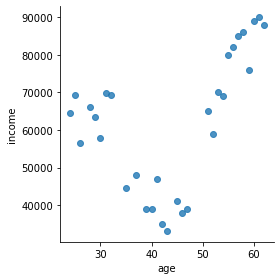

In [13]:
#2 Importing the Libraries
import numpy as np
import seaborn as sn
import matplotlib as plt
%matplotlib inline
sn.lmplot("age","income", data = customers_df, fit_reg = False, size = 4)

In [3]:
#3 KMeans
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [4]:
customers_df["clusterid"] = clusters.labels_

In [5]:
customers_df.head(5)

,age,income,clusterid
0,25,69343,1
1,28,66205,1
2,30,57731,1
3,29,63525,1
4,31,69891,1


In [14]:
#shuffling
customers_df.sample(frac=1).head(8)

,age,income,clusterid,clusterid_new
21,54,69000,1,0
11,40,39000,0,1
10,39,38900,0,1
22,55,80000,2,0
14,45,41111,0,1
0,25,69343,1,2
27,60,89000,2,0
28,61,90000,2,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


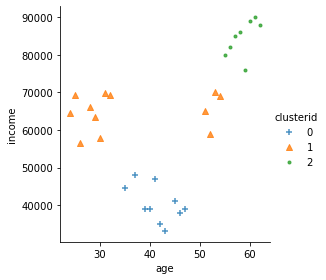

In [6]:
#4 Plotting the clusters
markers = ['+', '^', '.']
sn.lmplot("age", "income", data =customers_df, hue = "clusterid", fit_reg = False, markers = markers, size=4)

In [7]:
#5 Scaling The Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]])
scaled_customers_df[0:5]

array([[-1.58294052,  0.41411441],
       [-1.33212248,  0.23763705],
       [-1.16491046, -0.23893055],
       [-1.24851647,  0.08691707],
       [-1.08130444,  0.44493328]])

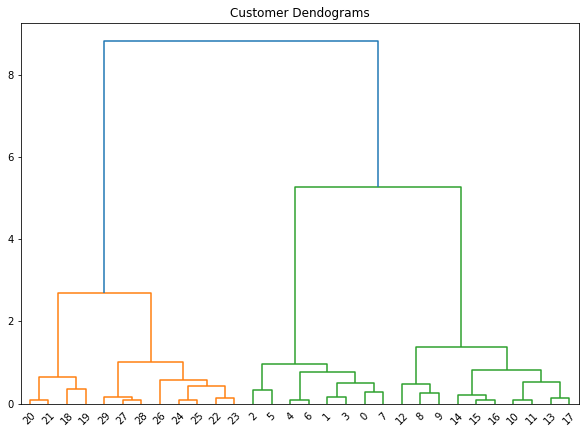

In [59]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_customers_df, method='ward'))

In [8]:
#6 KMeans after SCALING the Features
from sklearn.cluster import KMeans
clusters_new = KMeans(3)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_
customers_df.head(10)

,age,income,clusterid,clusterid_new
0,25,69343,1,2
1,28,66205,1,2
2,30,57731,1,2
3,29,63525,1,2
4,31,69891,1,2
5,26,56642,1,2
6,32,69150,1,2
7,24,64445,1,2
8,35,44555,0,1
9,37,47900,0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


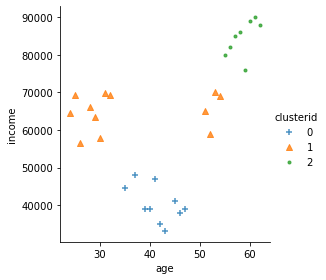

In [9]:
#7 Plotting AGAIN
markers = ['+', '^', '.']
sn.lmplot("age", "income", data =customers_df, hue = "clusterid", fit_reg = False, markers = markers, size=4)

# PROBLEM STATEMENT: USE THE BEV.CSV DATASET; APPLY KMEANS AND AGGLOMERATIVE CLUSTERING; COMPARE THE OBTAINED CLUSTER

In [16]:
#1 Imorting the data set
bev_df=pd.read_csv("bev.csv")
bev_df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [18]:
#2 We have already imported the libraries
#3 SCALE THE FEATURES
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_bev_df= scaler.fit_transform(bev_df[["Potassium","Sodium","Caffeine","Cost"]])
scaled_bev_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

In [62]:
#4 KMEANS CLUSTERING 
from sklearn.cluster import KMeans  #AGGLOMERATIVECLUSTERING   (Assignment)
clusters=KMeans(3)
clusters.fit(scaled_bev_df)
bev_df["clusterid"]=clusters.labels_
bev_df.head(15)

,Name,Potassium,Sodium,Caffeine,Cost,clusterid
0,new_england_coffee,144,15,4.7,0.43,1
1,post_alley_blend,151,19,4.9,0.43,1
2,stumpdown_coffee,157,15,0.9,0.48,0
3,bizzy_organic_coffee,170,7,5.2,0.73,2
4,indian_bean,152,11,5.0,0.77,2
5,jacobs_coffee,145,23,4.6,0.28,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1
7,la_columbe_corisca,149,27,4.7,0.42,1
8,lavazza_super_crema,99,10,4.3,0.43,0
9,mount_hagen,113,8,3.7,0.40,0


In [41]:
# TO LOOK AT THE CLUSTERS:
bev_df[bev_df.clusterid==1]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid
2,stumpdown_coffee,157,15,0.9,0.48,1
8,lavazza_super_crema,99,10,4.3,0.43,1
9,mount_hagen,113,8,3.7,0.40,1
11,peerless_wholebean,102,15,4.1,0.46,1
12,stone_street_coffee,135,11,4.2,0.50,1
15,caribou_coffee,68,15,2.3,0.38,1
18,davidoff_coffee,72,6,2.9,0.46,1
19,js_coffee,97,7,4.2,0.47,1


In [42]:
bev_df[bev_df.clusterid==2]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid
3,bizzy_organic_coffee,170,7,5.2,0.73,2
4,indian_bean,152,11,5.0,0.77,2
13,green_mountain_coffee,150,19,4.7,0.76,2
14,koffee_cuit,149,6,5.0,0.79,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


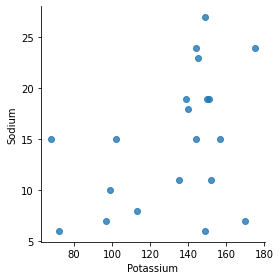

In [60]:
sn.lmplot("Potassium","Sodium", data =  bev_df, fit_reg= False, size = 4)

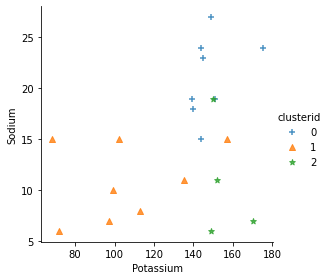

In [61]:
markers = ['+','^','*']
sn.lmplot("Potassium","Sodium", data = bev_df, hue= "clusterid", fit_reg = False, markers = markers, size=4)

In [51]:
#Agglomerative clustering
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(2, linkage= "ward")
categories = ac.fit_predict(scaled_bev_df)

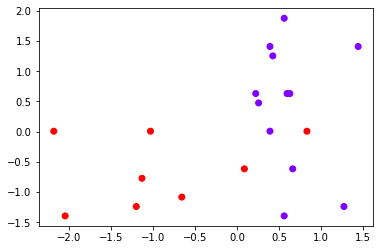

In [52]:

plt.scatter(scaled_bev_df[:,0],scaled_bev_df[:,1], c=ac.labels_, cmap="rainbow")

In [53]:
ac.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

plotting dendogram for bev.csv data

In [54]:
import scipy.cluster.hierarchy as shc

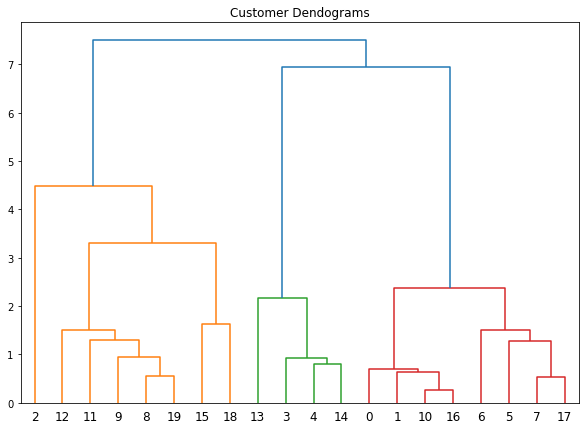

In [55]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_bev_df, method='ward'))

In [56]:
# clustering data into 5 categories using agglomerative clustering

clustering1 = AgglomerativeClustering(5, linkage= "ward")
clustering1.fit_predict(scaled_bev_df)

array([0, 0, 3, 2, 2, 0, 0, 0, 4, 4, 0, 4, 4, 2, 2, 1, 0, 0, 1, 4],
      dtype=int64)

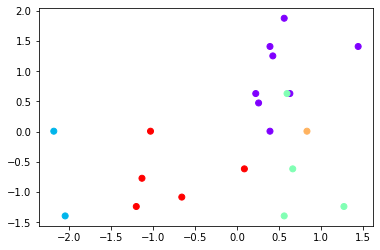

In [57]:
plt.scatter(scaled_bev_df[:,0],scaled_bev_df[:,1], c=clustering1.labels_, cmap="rainbow")